# Baseline Model based on U-Net

In [1]:
import os

# needed to get the path right
os.chdir("..")

## Training

In [2]:
from baseline.trainer import Trainer

trainer = Trainer()

Segmentation Models: using `tf.keras` framework.


In [3]:
model = trainer.get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [4]:
%time history = trainer.train_from_simple_dataloader(dataset_size=10, batch_size=1, epochs=50)

Epoch 1/50
9/9 - 27s - loss: 1.5897 - iou_score: 0.1718 - val_loss: 1.7586 - val_iou_score: 0.0201
Epoch 2/50
9/9 - 21s - loss: 1.3155 - iou_score: 0.2508 - val_loss: 1.8026 - val_iou_score: 0.0199
Epoch 3/50
9/9 - 21s - loss: 1.1989 - iou_score: 0.2921 - val_loss: 1.9214 - val_iou_score: 0.0199
Epoch 4/50
9/9 - 21s - loss: 1.1264 - iou_score: 0.3197 - val_loss: 2.0572 - val_iou_score: 0.0207
Epoch 5/50
9/9 - 21s - loss: 1.0661 - iou_score: 0.3438 - val_loss: 2.1632 - val_iou_score: 0.0205
Epoch 6/50
9/9 - 21s - loss: 1.0122 - iou_score: 0.3664 - val_loss: 2.0945 - val_iou_score: 0.0197
Epoch 7/50
9/9 - 21s - loss: 0.9661 - iou_score: 0.3865 - val_loss: 2.1368 - val_iou_score: 0.0206
Epoch 8/50
9/9 - 21s - loss: 0.9301 - iou_score: 0.4020 - val_loss: 2.2891 - val_iou_score: 0.0218
Epoch 9/50
9/9 - 21s - loss: 0.8952 - iou_score: 0.4179 - val_loss: 2.1280 - val_iou_score: 0.0215
Epoch 10/50
9/9 - 21s - loss: 0.8662 - iou_score: 0.4308 - val_loss: 2.0004 - val_iou_score: 0.0191
Epoch 11/

In [5]:
history.history['iou_score']

[0.17180156707763672,
 0.25080591440200806,
 0.2921377420425415,
 0.31967630982398987,
 0.34377744793891907,
 0.3664398193359375,
 0.3865203261375427,
 0.4020039141178131,
 0.4178915023803711,
 0.43078356981277466,
 0.4439145624637604,
 0.4554816484451294,
 0.45769771933555603,
 0.4593779146671295,
 0.4613287150859833,
 0.4627809524536133,
 0.46412453055381775,
 0.46563127636909485,
 0.4670179784297943,
 0.4682425260543823,
 0.4695281982421875,
 0.4707950949668884,
 0.4720900356769562,
 0.4733324646949768,
 0.4745330810546875,
 0.47584301233291626,
 0.4769969582557678,
 0.47821712493896484,
 0.4794039726257324,
 0.48058250546455383,
 0.48179593682289124,
 0.48291873931884766,
 0.48407119512557983,
 0.4852418899536133,
 0.4864312410354614,
 0.4874911308288574,
 0.48866939544677734,
 0.48975133895874023,
 0.4909239411354065,
 0.491998553276062,
 0.4931092858314514,
 0.49414193630218506,
 0.49519094824790955,
 0.4963580369949341,
 0.497354656457901,
 0.49845096468925476,
 0.49945306777954

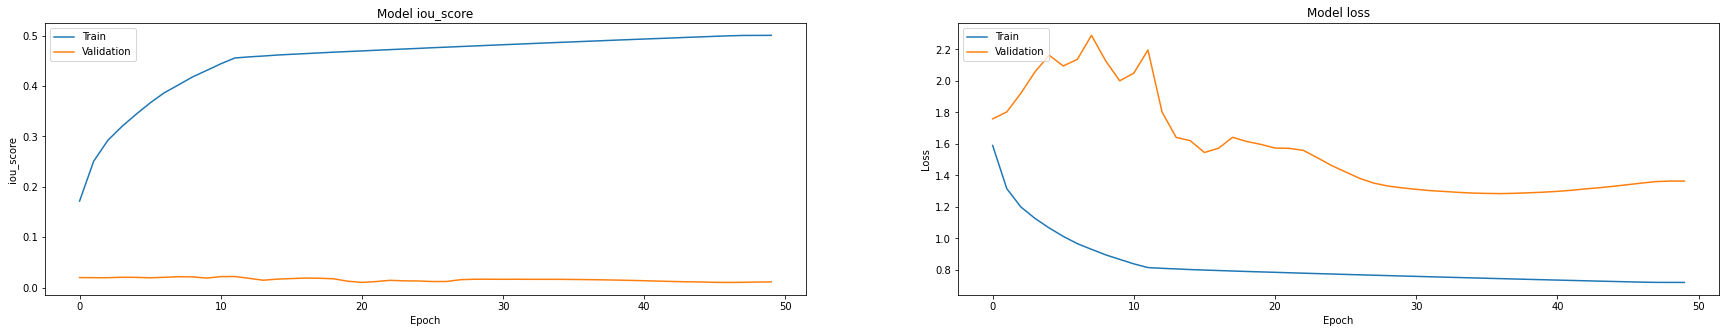

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [8]:
import segmentation_models as sm
from constants import TEST_DIR
from utils.dataloader import SimpleDataLoader
from utils.helper import Visualisation

simple_data_loader = SimpleDataLoader(
    backbone=Trainer.BACKBONE,
    images_path=os.path.join(TEST_DIR, "images"),
    size=10
)

test_images = simple_data_loader.get_images()

(512, 512, 3)
(1, 512, 512, 3)


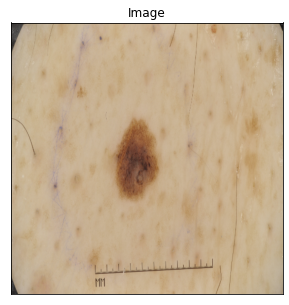

In [9]:
import numpy as np

test_image = test_images[1]

print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)  # add batch dimension
print(test_image.shape)

Visualisation().show(image=test_image.squeeze())

In [10]:
predicted_mask = model.predict(test_image).round()
print(predicted_mask.shape)

(1, 512, 512, 1)


In [11]:
predicted_mask[..., 0].shape

(1, 512, 512)

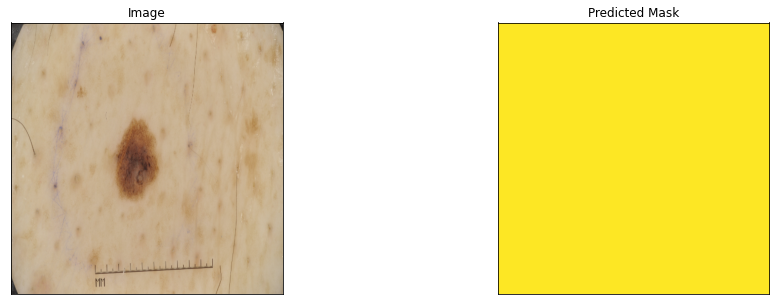

In [12]:
Visualisation().show(
    image=test_image.squeeze(),
    predicted_mask=predicted_mask[..., 0].squeeze()
)

(1, 512, 512, 3)
(1, 512, 512, 1)


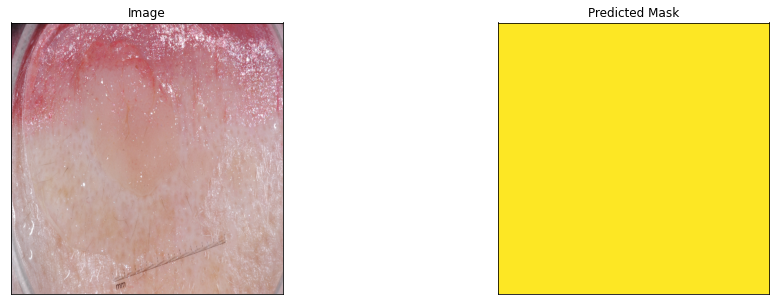

(1, 512, 512, 3)
(1, 512, 512, 1)


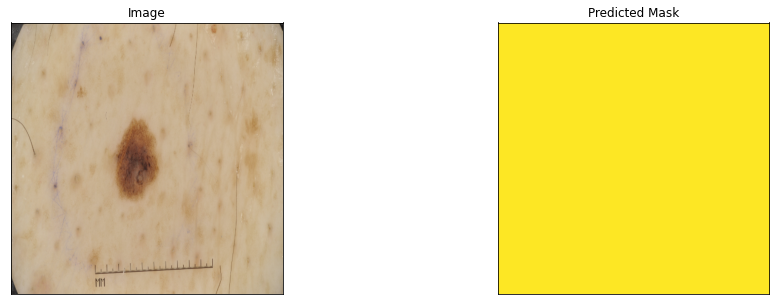

(1, 512, 512, 3)
(1, 512, 512, 1)


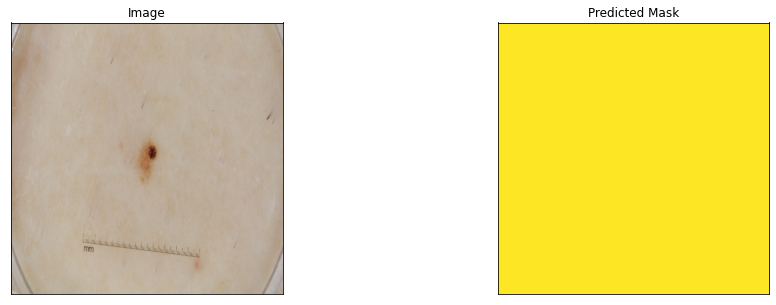

In [13]:
for test_image in simple_data_loader.get_images()[:3]:
    test_image = np.expand_dims(test_image, axis=0)
    print(test_image.shape)
    predicted_mask = model.predict(test_image).round()
    print(predicted_mask.shape)
    
    Visualisation().show(
        image=test_image.squeeze(),
        predicted_mask=predicted_mask[..., 0].squeeze()
    )